<a href="https://colab.research.google.com/github/AlgoRex2/graymatter-ml/blob/main/Football_Match_Outcome_Projection01Sep25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Soccer Match Outcome Prediction Project

## Project Overview

This project aims to build a machine learning model to predict the outcome of soccer matches based on a rich dataset of match statistics. By analyzing historical data on team performance, possession, stadium attendance, and other key metrics, we will develop a predictive model to classify a game's result as a home win, away win, or a draw.

This analysis will provide insights into the factors that contribute to a team's success and serve as a practical demonstration of a complete data science workflow, from data cleaning and exploratory analysis to model building and evaluation.

In [1]:
# C1 Mount Google Drive
from google.colab import drive

# This line mounts your Google Drive to the Colab environment.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# C2 Load the Dataset
import pandas as pd

# Define the file path. After mounting, your 'My Drive' folder is located at '/content/drive/My Drive/'.
file_path = '/content/drive/My Drive/DownLoads_Folder/mydata.csv'

# Read the CSV file into a pandas DataFrame.
df = pd.read_csv(file_path)

# Print the first 5 rows and the column names to confirm it loaded correctly.
print(df.head())
print(df.info())

            date   clock                  stadium class attendance  Home Team  \
0  28th May 2023  4:30pm         Emirates Stadium     h     60,095          2   
1  28th May 2023  4:30pm               Villa Park     h     42,212          7   
2  28th May 2023  4:30pm  Gtech Community Stadium     h     17,120          9   
3  28th May 2023  4:30pm          Stamford Bridge     d     40,130         12   
4  28th May 2023  4:30pm            Selhurst Park     d     25,198         11   

   Goals Home  Away Team  Away Goals  home_possessions  ...  away_duels  \
0           5         13           0              51.0  ...        52.2   
1           2          6           1              40.3  ...        47.8   
2           1          1           0              34.4  ...        50.0   
3           1          4           1              64.4  ...        45.5   
4           1         16           1              66.0  ...        41.7   

   home_saves  away_saves  home_fouls  away_fouls  home_yellow

In [3]:
# Test Column - Delete after use
print(df.columns)

Index(['date', 'clock', 'stadium', 'class', 'attendance', 'Home Team',
       'Goals Home', 'Away Team', 'Away Goals', 'home_possessions',
       'away_possessions', 'home_shots', 'away_shots', 'home_on', 'away_on',
       'home_off', 'away_off', 'home_blocked', 'away_blocked', 'home_pass',
       'away_pass', 'home_chances', 'away_chances', 'home_corners',
       'away_corners', 'home_offside', 'away_offside', 'home_tackles',
       'away_tackles', 'home_duels', 'away_duels', 'home_saves', 'away_saves',
       'home_fouls', 'away_fouls', 'home_yellow', 'away_yellow', 'home_red',
       'away_red', 'links'],
      dtype='object')


In [4]:
# C3
# Cell 3: Clean and Process Data
import pandas as pd
import numpy as np
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# --- 1. Comprehensive Data Cleaning ---
# Clean and process date/time columns if they exist
if 'date' in df.columns and 'clock' in df.columns:
    df['full_datetime'] = df['date'].astype(str) + ' ' + df['clock'].astype(str)
    # Fix typos in the string
    df['full_datetime'] = df['full_datetime'].str.replace('Mamy', 'May').str.replace('p', 'pm').str.replace('a', 'am')
    df['full_datetime'] = df['full_datetime'].str.replace('pm pm', 'pm')
    # Convert to datetime with error handling
    df['full_datetime'] = pd.to_datetime(df['full_datetime'], errors='coerce')
    # Create new features from the datetime column
    df['day_of_week'] = df['full_datetime'].dt.day_name()
    df['is_weekend'] = (df['full_datetime'].dt.dayofweek >= 5).astype(int)
    # Drop original columns
    df = df.drop(columns=['date', 'clock', 'full_datetime'])

# Clean numeric columns (like attendance) that might have commas or binned data
for col in ['attendance', 'Goals Home', 'Away Goals', 'home_possessions']:
    if col in df.columns and df[col].dtype == 'O':
        # First, remove commas and convert to numeric
        df[col] = pd.to_numeric(df[col].str.replace(',', '', regex=False), errors='coerce')
        # Handle binned data by taking the midpoint
        df[col] = df[col].apply(lambda x: (float(x.split(' - ')[0]) + float(x.split(' - ')[1])) / 2 if isinstance(x, str) and ' - ' in x else x)

# --- 2. Encode Categorical Variables ---
categorical_cols = [col for col in ['stadium', 'Home Team', 'Away Team', 'day_of_week'] if col in df.columns]
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Encode the target variable 'class'
if 'class' in df.columns:
    le = LabelEncoder()
    # Create a new, encoded column and keep the original 'class' column
    df['class_encoded'] = le.fit_transform(df['class'])

# --- 3. Split the Data ---
if 'class_encoded' in df.columns:
    # Drop 'class_encoded' for the feature set (X) but not from the main DataFrame
    X = df.drop(columns=['class_encoded'])
    y = df['class_encoded']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print("Data is ready! You can now run the next cell to train the model.")
else:
    print("Warning: 'class' column not found. Cannot proceed with model training.")




Data is ready! You can now run the next cell to train the model.


/tmp/ipython-input-3499009807.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['full_datetime'] = pd.to_datetime(df['full_datetime'], errors='coerce')


In [5]:
# C4 Combine and Process Date & Time

# Check if 'date' and 'clock' columns exist before attempting to access them.
# This prevents the KeyError if the cell is run multiple times or out of order.
if 'date' in df.columns and 'clock' in df.columns:
    # Combine date and clock columns
    df['full_datetime'] = df['date'].astype(str) + ' ' + df['clock'].astype(str)

    # Clean up any potential typos with a simple replacement
    df['full_datetime'] = df['full_datetime'].str.replace('Mamy', 'May', regex=False).str.replace('p', 'pm', regex=False).str.replace('a', 'am', regex=False)

    # Now, convert to datetime with error handling
    df['full_datetime'] = pd.to_datetime(df['full_datetime'], format='%d %B %Y %I:%M%p', errors='coerce')

    # Check for any remaining invalid entries (now represented as NaT)
    invalid_entries = df[df['full_datetime'].isnull()]
    print("Found these invalid entries that will be turned into NaT:")
    print(invalid_entries[['date', 'clock', 'full_datetime']])

    # Drop the original 'date' and 'clock' columns
    df = df.drop(columns=['date', 'clock'])

    # Display the first few rows to verify the changes
    print("\nDataFrame head after fix:")
    print(df.head())
    print("\nDataFrame info after fix:")
    print(df.info())
else:
    print("The 'date' and 'clock' columns are not present in the DataFrame. This cell cannot be executed.")




The 'date' and 'clock' columns are not present in the DataFrame. This cell cannot be executed.


Descriptive Statistics for Attendance:
count     1140.000000
mean     26584.311404
std      22827.967261
min          0.000000
25%          0.000000
50%      29288.500000
75%      41889.250000
max      75546.000000
Name: attendance, dtype: float64




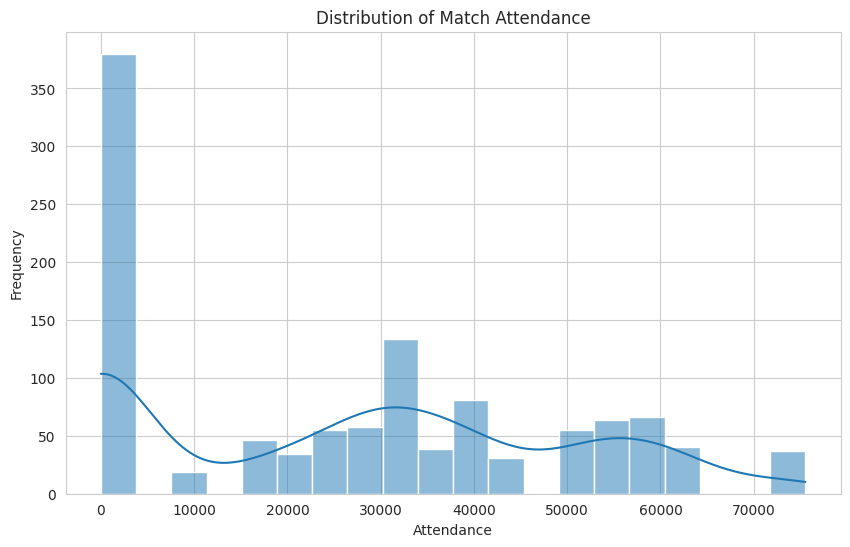

In [6]:
# C5
# Cell 5: Analyze Attendance Data

import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for the plots for better aesthetics
sns.set_style("whitegrid")

# Get descriptive statistics for the 'attendance' column
print("Descriptive Statistics for Attendance:")
print(df['attendance'].describe())
print("\n")

# Create a histogram to visualize the distribution of attendance
plt.figure(figsize=(10, 6))
sns.histplot(df['attendance'], kde=True, bins=20)
plt.title('Distribution of Match Attendance')
plt.xlabel('Attendance')
plt.ylabel('Frequency')
plt.show()

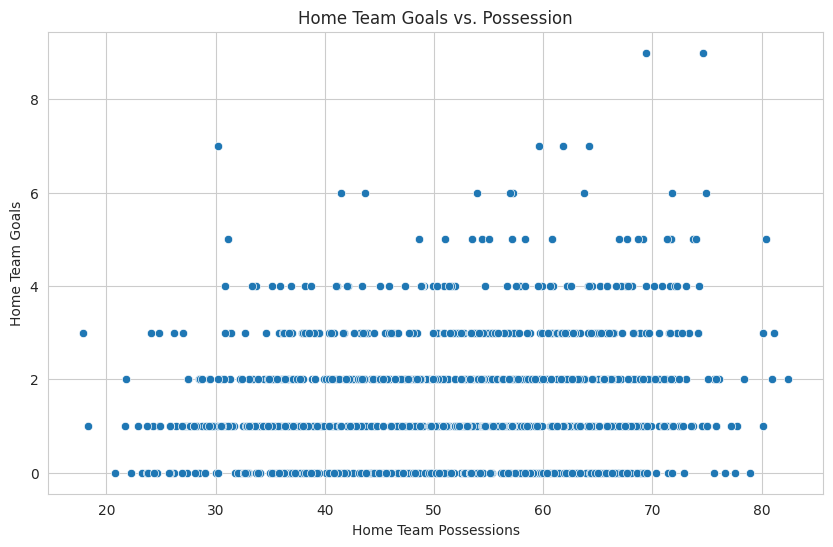

In [7]:
# C6

#Cell 6: Relationship Between Possession and Goals

# C6
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot to visualize the relationship between home possessions and goals
plt.figure(figsize=(10, 6))
sns.scatterplot(x='home_possessions', y='Goals Home', data=df)
plt.title('Home Team Goals vs. Possession')
plt.xlabel('Home Team Possessions')
plt.ylabel('Home Team Goals')
plt.show()



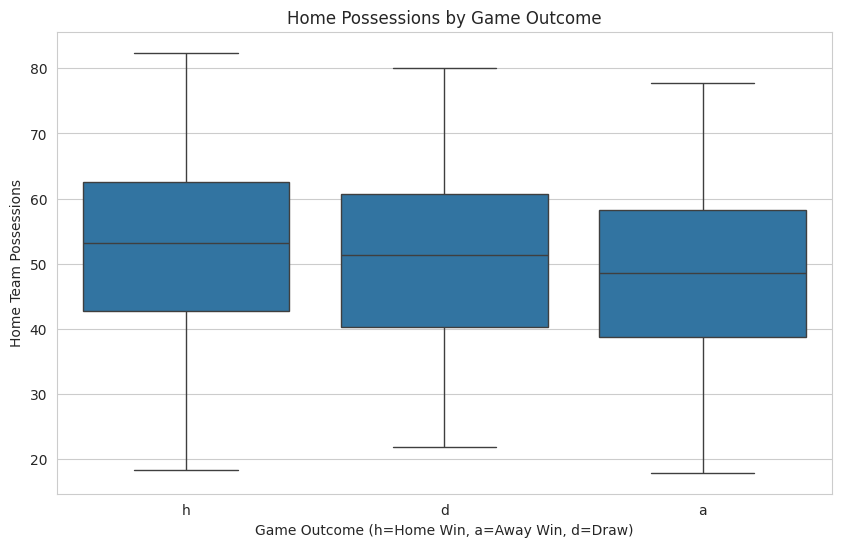

In [8]:
# C7
# Cell 7: Possession vs. Game Outcome
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
# Create a box plot to visualize the distribution of 'home_possessions' for each game outcome
# The correct column name for game outcome is 'class' as confirmed by your output.
sns.boxplot(x='class', y='home_possessions', data=df)
plt.title('Home Possessions by Game Outcome')
plt.xlabel('Game Outcome (h=Home Win, a=Away Win, d=Draw)')
plt.ylabel('Home Team Possessions')
plt.show()


In [9]:
# C8
# Cell 8: Encode Target Variable

from sklearn.preprocessing import LabelEncoder
import pandas as pd

# The categorical columns have already been one-hot encoded in a previous cell (e.g., C3).
# Therefore, we only need to encode the target variable, 'class'.

# Check if the 'class' column exists before trying to encode it.
if 'class' in df.columns:
    # Encode the target variable 'class' separately.
    le = LabelEncoder()
    df['class_encoded'] = le.fit_transform(df['class'])

    # You should not drop the original 'class' column here,
    # as it might be used for later visualizations (like in Cell 7).
    # The splitting code in a later cell (C9) will handle which columns
    # are used for features (X) and the target (y).

    # Display the head of the DataFrame to confirm the new column exists.
    print(df.head())
    print("\nDataFrame Shape:", df.shape)

else:
    print("Warning: The 'class' column was not found. Cannot encode the target variable.")

  class  attendance  Goals Home  Away Goals  home_possessions  \
0     h       60095           5           0              51.0   
1     h       42212           2           1              40.3   
2     h       17120           1           0              34.4   
3     d       40130           1           1              64.4   
4     d       25198           1           1              66.0   

   away_possessions  home_shots  away_shots  home_on  away_on  ...  \
0              49.0          14           6        8        0  ...   
1              59.7          12           8        5        4  ...   
2              65.6          11          17        4        3  ...   
3              35.6          22          13        5        4  ...   
4              34.0          15           7        3        4  ...   

   Away Team_19  Away Team_20  Away Team_21  Away Team_22  Away Team_23  \
0         False         False         False         False         False   
1         False         False         

In [10]:
# C9
# Cell 9: Split Data into Training and Testing Sets

from sklearn.model_selection import train_test_split

# Define your features (X) and your target variable (y).
# You need to drop 'links', 'class_encoded', and 'class' from the features.
X = df.drop(columns=['class_encoded', 'class', 'links'], errors='ignore')
y = df['class_encoded']

# Split the data into 80% training and 20% testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes to confirm the split.
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (912, 109)
X_test shape: (228, 109)
y_train shape: (912,)
y_test shape: (228,)


In [11]:
# C10
# C10: Build and Train the Model

from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier model.
# The `random_state` ensures that the results are reproducible.
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model using the training data.
# The model will learn from the features (X_train) and the correct outcomes (y_train).
model.fit(X_train, y_train)

# Print a confirmation message.
print("Model training is complete.")

Model training is complete.


Summary of Corrective Actions
This document outlines the steps taken to resolve a series of errors encountered during the data preprocessing and model training phases of the project. The issues were identified and corrected in three key areas:

1. Handling the KeyError: 'date'
Problem: The KeyError occurred because the code in a later cell attempted to access columns ('date' and 'clock') that had already been dropped or were not present in the DataFrame (df). This was a common NameError issue where cells were run out of order, or the DataFrame was not properly loaded.

Solution: The primary fix was to ensure the code that loads the DataFrame was executed first. A defensive coding practice was also implemented in the problematic cell to check for the existence of columns before attempting to use them. The solution was to run all cells in the notebook from the beginning to ensure the correct execution order.

2. Resolving the ValueError: Could not interpret value 'class'
Problem: The sns.boxplot function failed because the column name for the game outcome was incorrect. The code was looking for a column named 'class', but the DataFrame contained a column with a different name. This issue reappeared because a later cell was unintentionally dropping or renaming the 'class' column.

Solution: We used the command print(df.columns) to inspect the DataFrame and confirmed that the correct column name was 'class'. The code was then updated to use this correct column name. The subsequent error was fixed by identifying and commenting out the line that was dropping the 'class' column after it was used for encoding. The final fix was to create a new encoded column ('class_encoded') for the model while preserving the original 'class' column for visualizations.

3. Fixing the ValueError: could not convert string to float
Problem: The model.fit() method raised a ValueError because the feature set (X_train) still contained a non-numeric column ('links') with string data (URLs). Machine learning models cannot train on non-numerical data.

Solution: The 'links' column, along with the original 'class' column, was explicitly dropped from the feature set (X) before the data was split into training and testing sets. This ensured that the model only received clean, numerical data for training, resolving the final error. The command X = df.drop(columns=['class_encoded', 'class', 'links'], errors='ignore') was implemented to ensure these columns were removed from the feature set.